# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Type your code here
# Dataset yang digunakan adalah Tehran House Prices Dataset yang berasal dari public repositories Kaggle.
#Dataset Tehran House Prices Dataset terdiri dari 1 file csv yang berisikan 3480 rows, dan 8 columns yaitu Area, Room, Parking, Warehouse, Elevator, Address, Price, Price(USD).
#Tipe data untuk dataset yang digunakan terdiri dari 2 tipe, yaitu:
#1. Data Kategorikal: parking, warehouse, elevator, dan address
#2. Data Numerikal: area, room, price, price (usd)

#note: price merupakan harga rumah dalam IRR atau Iranian Rials, dan jenis dataset untuk parking, warehouse dan elevator merupakan Boolean, yaitu true or false. ###

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# URL of the raw CSV files from the GitHub repository
tehran_house = "https://raw.githubusercontent.com/destianiic/proyek-ml/refs/heads/main/TehranHouse.csv"

# Load dataset
tehranhouse_df = pd.read_csv(tehran_house, header=0)

# check dataset
tehranhouse_df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# check structure data
tehranhouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [ ]:
# check isnull in the dataset

tehranhouse_df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0
Price(USD),0


In [ ]:
# delete null value

tehranhouse_df = tehranhouse_df.dropna()

In [ ]:
# check isnull value again

tehranhouse_df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,0
Price,0
Price(USD),0


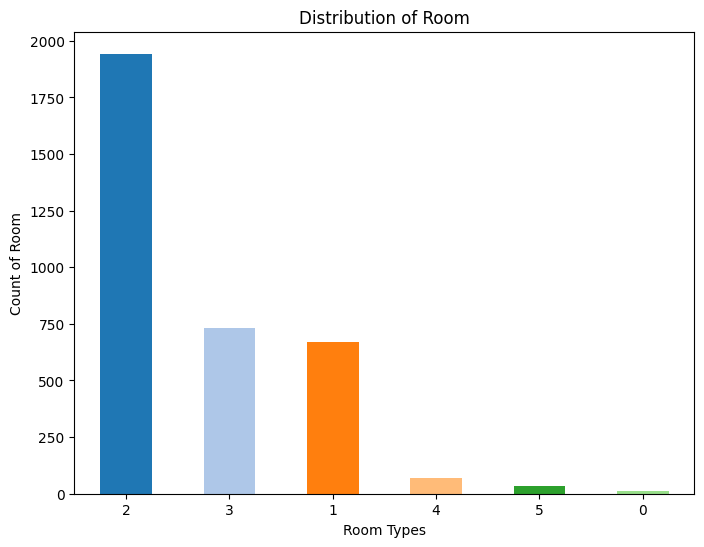

In [ ]:
import matplotlib.pyplot as plt

# Generate the room counts
room_counts = tehranhouse_df['Room'].value_counts()

# Generate a list of colors for each bar
colors = plt.colormaps['tab20'].colors

# Plot the bar chart
plt.figure(figsize=(8, 6))
room_counts.plot(kind='bar', color=colors[:len(room_counts)])
plt.xticks(rotation=0)

plt.title('Distribution of Room')
plt.xlabel('Room Types')
plt.ylabel('Count of Room')
plt.show()

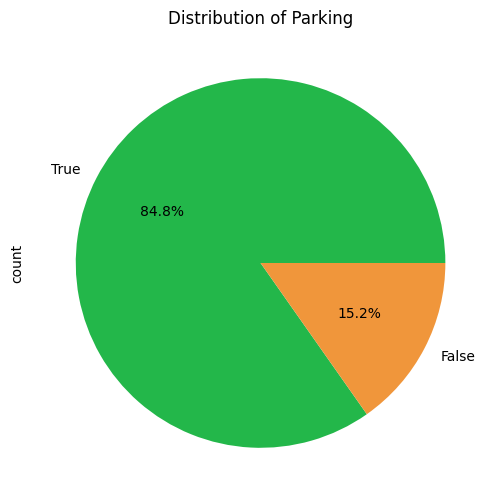

In [ ]:
# show the distribution of parking

colors = ['#23B74A', '#F0963B'] #custom color

plt.figure(figsize=(8, 6))
tehranhouse_df['Parking'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Parking')
plt.show()

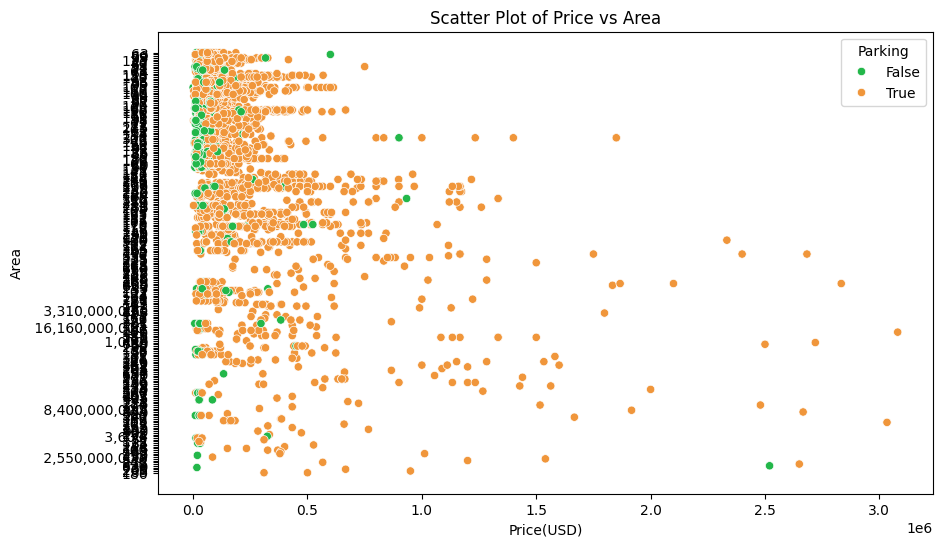

In [ ]:
# scatter plot between house that has a parking area vs the area itself

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tehranhouse_df, x='Price(USD)', y='Area', hue='Parking', palette=['#23B74A', '#F0963B'])
plt.title('Scatter Plot of Price vs Area')
plt.xlabel('Price(USD)')
plt.ylabel('Area')
plt.show()

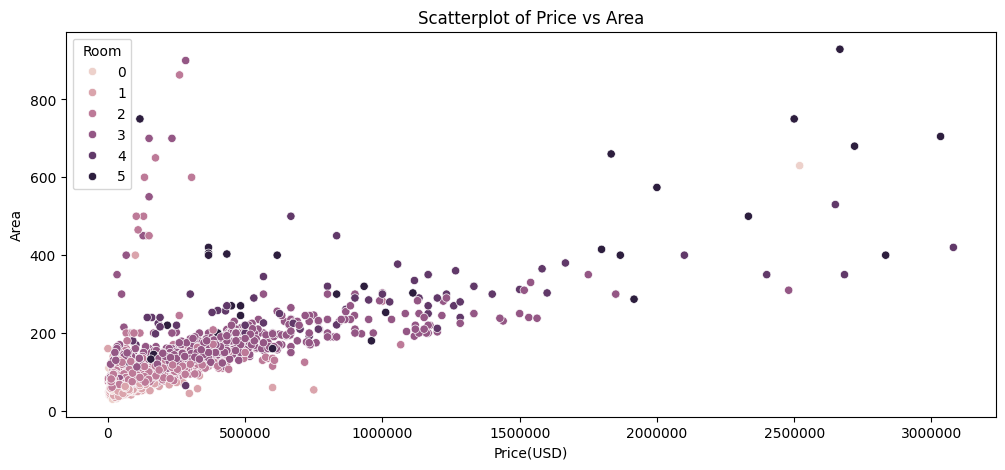

In [ ]:
#scatterplot between price vs area

# Ensure 'Price(USD)' and 'Area' are numeric
tehranhouse_df['Price(USD)'] = pd.to_numeric(tehranhouse_df['Price(USD)'], errors='coerce')
tehranhouse_df['Area'] = pd.to_numeric(tehranhouse_df['Area'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Price(USD)', y='Area', hue="Room", data=tehranhouse_df)

# Add title
plt.title('Scatterplot of Price vs Area')

# Apply ticklabel_format only to the x and y axes (numerical data)
plt.ticklabel_format(style='plain', axis='x')  # Format x-axis (Price)
plt.ticklabel_format(style='plain', axis='y')  # Format y-axis (Area)

# Show the plot
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

### missing value handling

In [ ]:
# handling missing values

tehranhouse_df.isna().sum()

,0
Area,6
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,0
Price,0
Price(USD),0


In [ ]:
# removing missing data

tehranhouse_df.dropna(subset=['Area'], inplace=True)
tehranhouse_df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


### duplicate data handling

In [ ]:
# check duplicate data
print("Number of duplicates: ", tehranhouse_df.duplicated().sum())

Number of duplicates:  208


In [ ]:
# remove duplicate rows and keep the 1st occurence

tehranhouse_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# check the duplicates were removed

tehranhouse_df.duplicated().sum()

0

### normalize data

In [ ]:
# normalization with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

tehranhouse_df['Area'] = MinMaxScaler().fit_transform(tehranhouse_df[['Area']])

### outliers handling

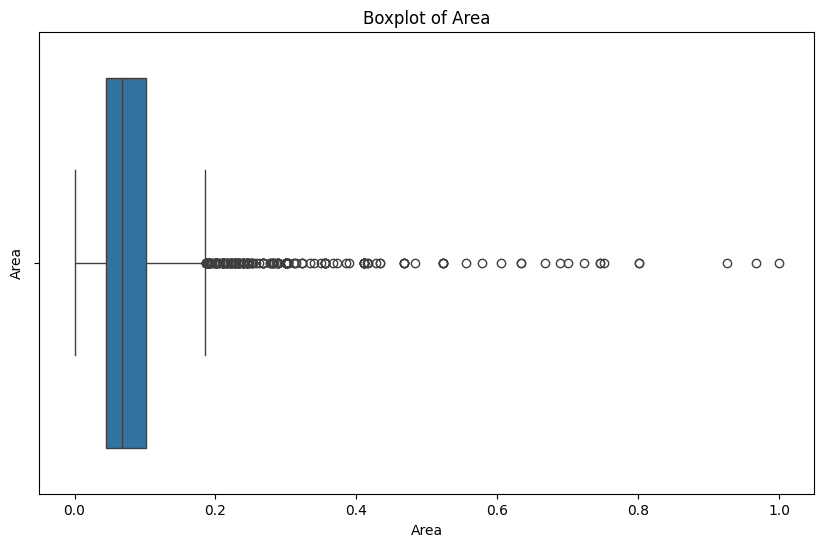

(-0.040600667408231365, 0.18631813125695218)


In [ ]:
# outlier detection with boxplot and IQR

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# vizualize boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=tehranhouse_df['Area'])
plt.title('Boxplot of Area')
plt.ylabel('Area')
plt.show()

lower_bound, upper_bound = detect_outliers(tehranhouse_df, 'Area')

outliers_area = detect_outliers(tehranhouse_df, 'Area')
print(outliers_area)

In [ ]:
# remove outliers

tehranhouse_df_no_outliers = tehranhouse_df[
    (tehranhouse_df['Area'] >= lower_bound) & (tehranhouse_df['Area'] <= upper_bound)
]

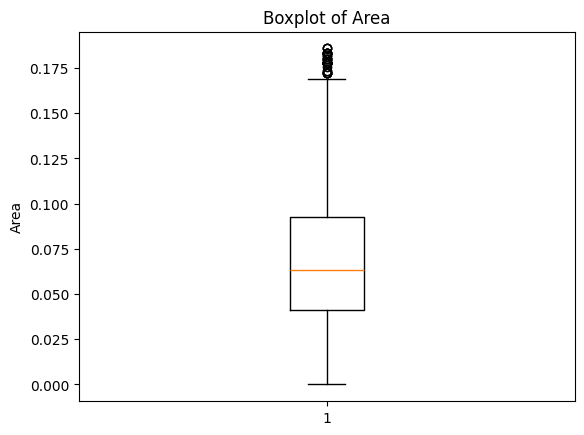

In [ ]:
# recheck outliers
plt.boxplot(tehranhouse_df_no_outliers['Area'])
plt.title('Boxplot of Area')
plt.ylabel('Area')
plt.show()

### encoding step

In [ ]:
# encoding the categorical datatype
# encoding the boolean columns (Parking, Warehouse, Elevator)

tehranhouse_df['Parking'] = tehranhouse_df['Parking'].astype(int)
tehranhouse_df['Warehouse'] = tehranhouse_df['Warehouse'].astype(int)
tehranhouse_df['Elevator'] = tehranhouse_df['Elevator'].astype(int)

In [ ]:
# encoding Address column with label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
tehranhouse_df['Address'] = label_encoder.fit_transform(tehranhouse_df['Address'])

In [ ]:
# recheck dataset
tehranhouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3242 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3242 non-null   float64
 1   Room        3242 non-null   int64  
 2   Parking     3242 non-null   int64  
 3   Warehouse   3242 non-null   int64  
 4   Elevator    3242 non-null   int64  
 5   Address     3242 non-null   int64  
 6   Price       3242 non-null   float64
 7   Price(USD)  3242 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 228.0 KB


### bining dataset

In [ ]:
# define price ranges for the categories
price_bins = [0, 1900000000, 5000000000, float('inf')]  # Adjusted boundaries
price_labels = ['Low', 'Medium', 'High']

# create the 'Price_Category' column
tehranhouse_df['Price_Category'] = pd.cut(
    tehranhouse_df['Price'],
    bins=price_bins,
    labels=price_labels,
    right=False,  # Include lower bound, exclude upper bound
    include_lowest=True  # Include 0 in the 'Low' category
)

# check the distribution of categories
print(tehranhouse_df['Price_Category'].value_counts())

Price_Category
Medium    1188
Low       1057
High       997
Name: count, dtype: int64


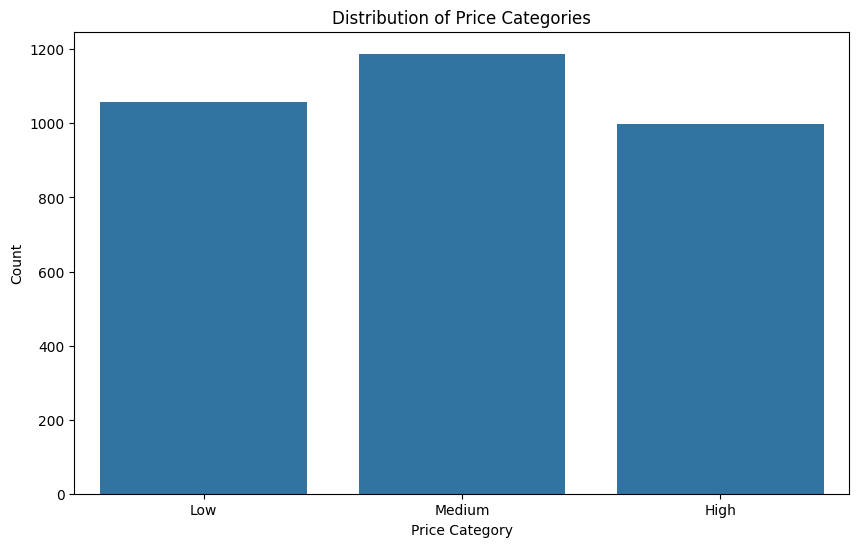

In [ ]:
# visualize binned data

plt.figure(figsize=(10, 6))
sns.countplot(data=tehranhouse_df, x='Price_Category')
plt.title('Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# clustering with K-Means

from sklearn.cluster import KMeans

X = tehranhouse_df.drop(columns=['Price', 'Price_Category'])

kmeans = KMeans(n_clusters=3, random_state=42)
tehranhouse_df['Cluster'] = kmeans.fit_predict(X)

# chech center and the distribution of it
print(kmeans.cluster_centers_)
print(tehranhouse_df['Cluster'].value_counts())

[[6.53567383e-02 1.88584475e+00 8.14307458e-01 9.00304414e-01
  7.56468798e-01 1.06703577e+02 9.04342212e+04]
 [1.54302874e-01 2.85447761e+00 9.75746269e-01 9.72014925e-01
  9.27238806e-01 9.53376866e+01 4.37935821e+05]
 [3.30053336e-01 3.62820513e+00 9.87179487e-01 9.87179487e-01
  7.94871795e-01 9.16282051e+01 1.52719872e+06]]
Cluster
0    2628
1     536
2      78
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

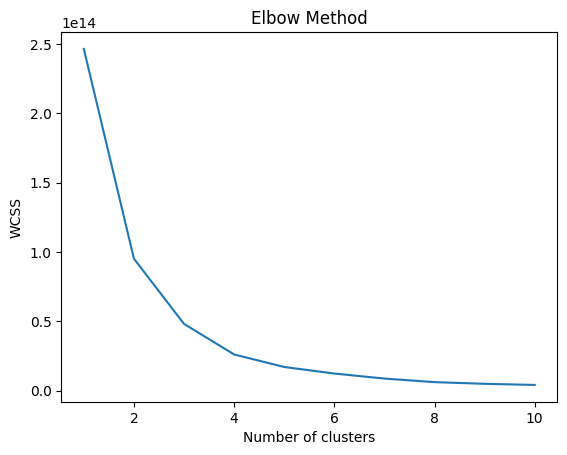

In [ ]:
# evaluate the model use with Elbow Method

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

berdasarkan gambar di atas maka cluster yang tepat untuk model ini adalah 4-5, karena pada saat jumlah cluster 4-5 inersia mulai menurun yang ditunjukkan oleh gambar di atas tersebut.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
# visualize with PCA Projections
# reduce dimensions using pca

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=60)
clusters = kmeans.fit_predict(X_pca)

In [ ]:
# add cluster labels to the dataframe
tehranhouse_df['Cluster'] = clusters

Text(0, 0.5, 'Principal Component 2')

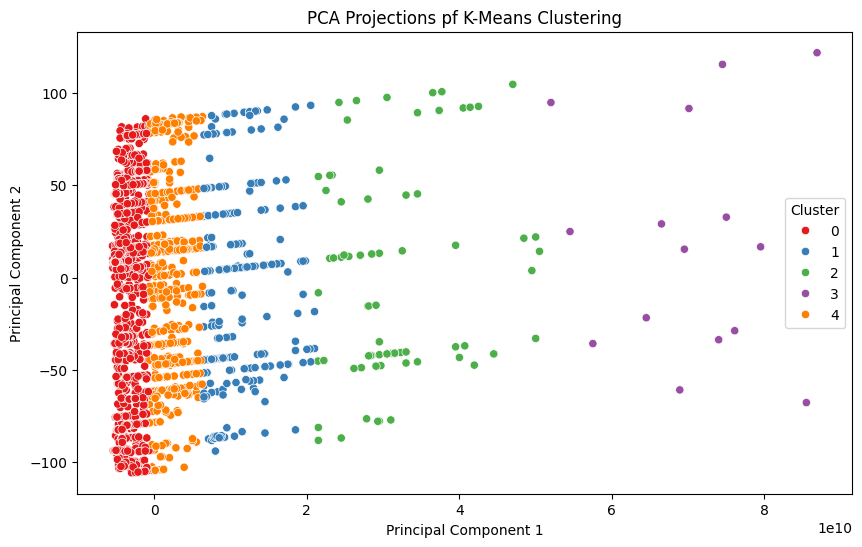

In [ ]:
# visualize with PCA Projections
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=tehranhouse_df['Cluster'], palette='Set1')
plt.title('PCA Projections pf K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# cluster statictic
cluster_stats = tehranhouse_df.groupby('Cluster').describe()
print(cluster_stats)

           Area                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        2231.0  0.059120  0.046913  0.000000  0.035595  0.053393  0.072303   
1         255.0  0.176684  0.058232  0.026696  0.140156  0.173526  0.191880   
2          74.0  0.272254  0.079703  0.155729  0.218576  0.266963  0.302836   
3          15.0  0.546162  0.208206  0.285873  0.383760  0.522803  0.695217   
4         667.0  0.112320  0.071712  0.016685  0.083426  0.101224  0.126808   

                     Room            ...         Price                \
              max   count      mean  ...           75%           max   
Cluster                              ...                               
0        0.800890  2231.0  1.802331  ...  3.060000e+09  4.800000e+09   
1        0.522803   255.0  3.027451  ...  1.870750e+10  2.650000e+10   
2      

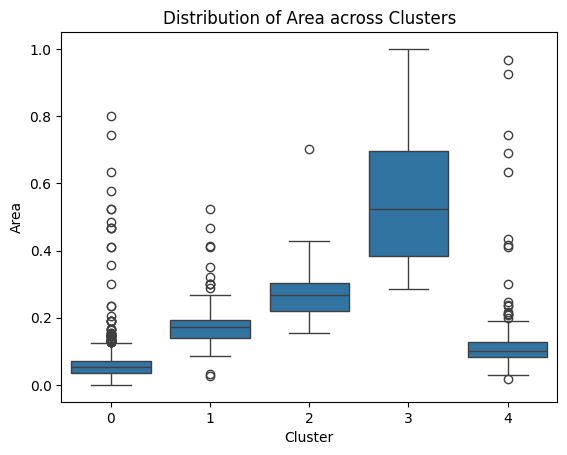

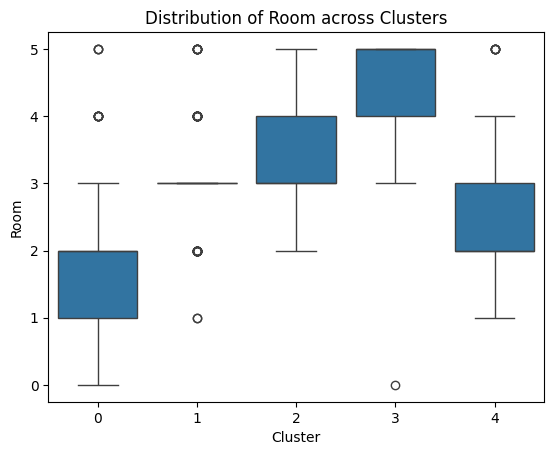

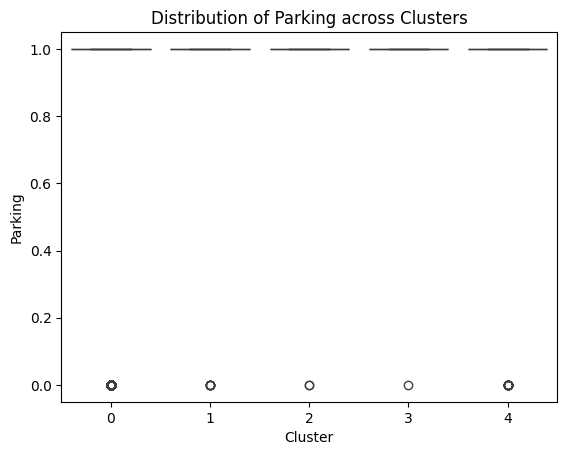

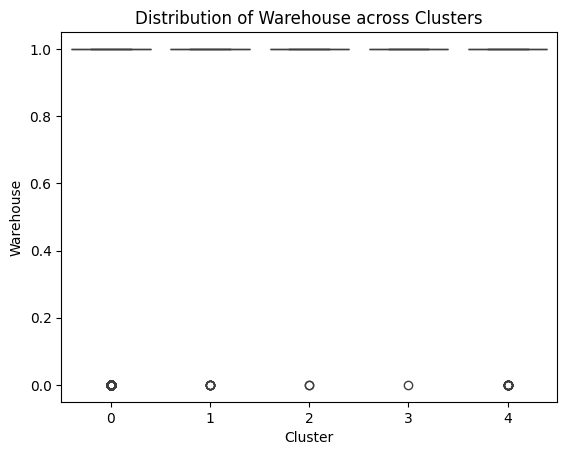

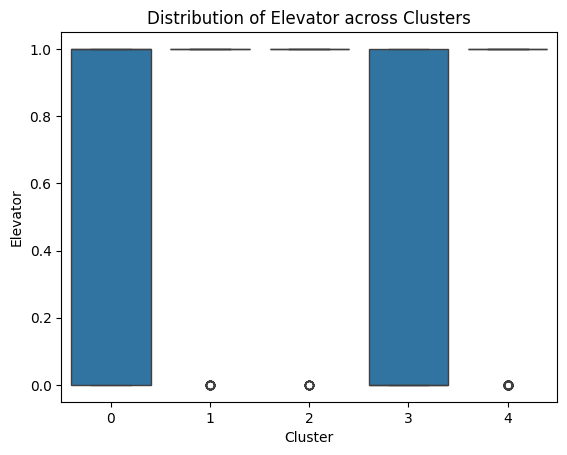

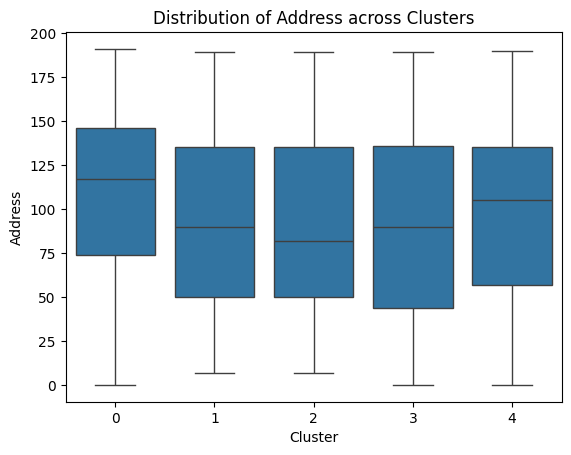

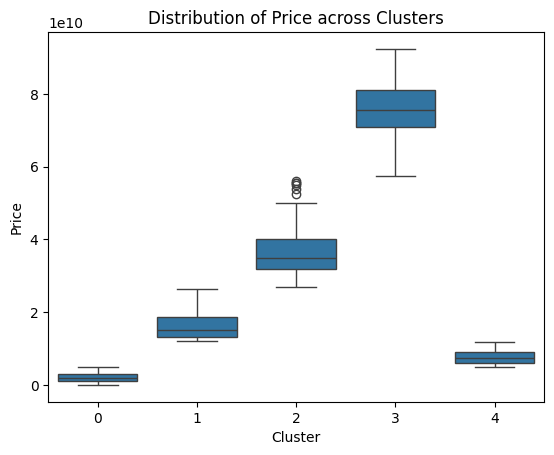

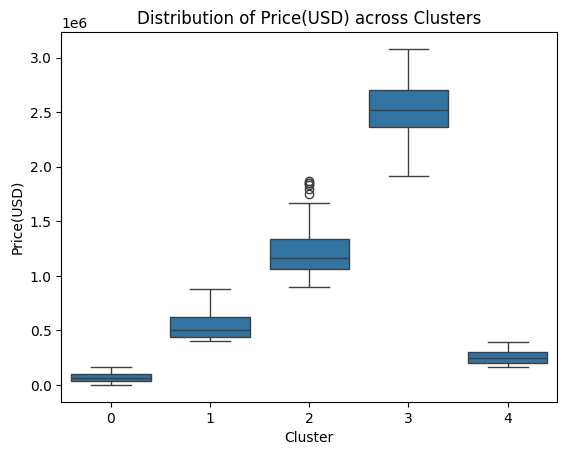

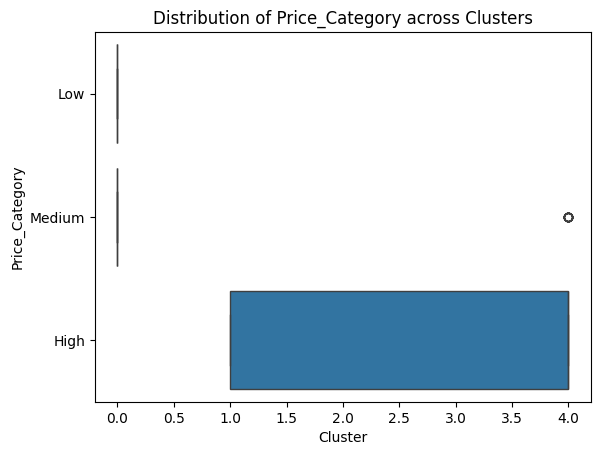

In [ ]:
# visualize
columns = tehranhouse_df.drop(columns=['Cluster']).columns

for feature in columns:
  sns.boxplot(x='Cluster', y=feature, data=tehranhouse_df) # Use tehranhouse_df
  plt.title(f'Distribution of {feature} across Clusters')
  plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0: nilai area relatif kecil yang berkisar antara 0 hingga 0.8 dnegan nilai media sebesar 0.053. Hal ini menunjukkan jika sebagian besar properti pada cluster 0 ini memiliki ukuran yang lebih kecil (hanya memiliki 1 atau 2 kamar tidur), dimana harga untuk properti cluster 0 relatif terjangkau dengan median sekitar 66.000 USD, sesuai dengan besar area yang ditawarkan.
2. Cluster 1: cluster 1 memiliki nilai area median yang lebih tinggi dibanding cluster 0 dengan median 0.173, hal ini menunjukkan ukuran properti pada cluster ini sedang dengan jumlah kamar rata-rata sebanyak 3 kamar, untuk harga sendiri berada di median sekitar 500.000 USD, menunjukkan bahwa properti pada cluster 1 ini memiliki kualitas yang lebih baik, baik dari area atau fasilitas tambahan seperti parking dan elevator.
3. Cluster 2: cluster 2 memiliki nilai besar, dengan median sebesar 0.267 yang mengindikasikan ukuran properti pada cluster ini cukup besar, jumlah kamar sebanya 3 atau lebih, untuk harga sendiri berada di median 1.166.667 USD yang menunjukkan properti di cluster 2 ini mewah dengan fasilitas yang lengkap dan berada di area yang strategis.
4. Cluster 3: Klaster 3 memiliki nilai median yang sangat besar yaitu sebesar 0.523 yang mengindikasikan properti di cluster ini ukurannya sangat besar, rata-rata nilai kamar sebesar 4.2 yang menunjukkan jumlah kamar yang banyak lebih dari cluster lainnya, untuk median harga sebesar 2.520.000 USD, tergolong sangat mahal dan besar dibandingkan dengan cluster lainnya, ini menunjukkan properti pada cluster 3 memiliki fasilitas sangat lengkap, yaitu memiliki kamar tidur yang banyak, terdapat area parking, elevator, dan berada di area properti yang strategis.
5. Cluster 4: cluster 4 ini memiliki nilai yang lebih kecil dibandingkan cluster 2 dan 3, tetapi lebih besar dari cluster 0 dan 1 dengan nilai media sebesar 0.101, memiliki nilai rata-rata kamar sebesar 2.5 yang menunjukkan bahwa properti di cluster ini memiliki kamar sebanyak 2 atau 3 kamar, harga properti pada cluster 4 dengan median sebesar 243.333 USD cukup tinggi dibandingkan dengan cluster 0 dan 1, dimana menunjukkan bawah properti pada cluster ini memiliki kualitas dan kelengkapan yang lebih baik dari cluster 0 dan 1, tetapi dengan harga yang relatif terjangkau, bisa jadi berada di area yang cukup strategis dengan fasilitas properti yng lebih lengkap.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# sfave the dataframe to csv file
tehranhouse_df.to_csv('tehranhouse_data.csv', index=False)